KMRD 데이터셋의 장르 데이터를 확인하고 시각화한다.

In [2]:
import pandas as pd

genres = pd.read_csv("kmrd-small/genres.csv")

In [3]:
genre_counts = genres['genre'].value_counts()
print(genre_counts)

genre
드라마       529
코미디       233
액션        211
멜로/로맨스    172
스릴러       162
모험        117
범죄        117
SF         80
공포         79
전쟁         75
판타지        55
미스터리       48
뮤지컬        41
가족         40
서부         31
느와르        15
에로         10
애니메이션       6
다큐멘터리       3
서사          1
Name: count, dtype: int64


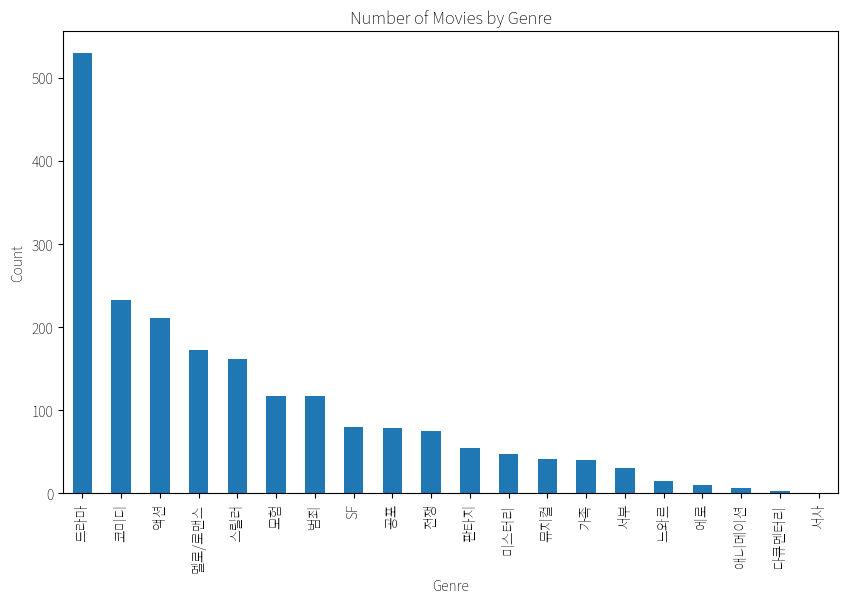

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

font_path = '/Users/heongjunpark/Library/Fonts/NotoSansKR-VariableFont_wght.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

mpl.rcParams['font.family'] = font_prop.get_name()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Number of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.yticks(range(0, 501, 100))
plt.show()

장르별 평균 평점을 확인하라

In [5]:
rates = pd.read_csv("kmrd-small/rates.csv")

In [6]:
merged_data = pd.merge(genres, rates, on='movie')
print(merged_data.head())

   movie genre  user  rate        time
0  10001   드라마     2    10  1323502620
1  10001   드라마     8    10  1468992000
2  10001   드라마     9    10  1192335840
3  10001   드라마    14    10  1328960520
4  10001   드라마    19    10  1090170780


In [7]:
# 장르별 평균 평점 계산
genre_avg_ratings = merged_data.groupby('genre')['rate'].mean()
print(genre_avg_ratings)

genre
SF        9.053674
가족        8.976904
공포        8.834317
느와르       8.965353
다큐멘터리     8.000000
드라마       8.965973
멜로/로맨스    9.007665
모험        8.958822
뮤지컬       9.233288
미스터리      8.690435
범죄        9.013579
서부        8.947997
서사        9.209619
스릴러       8.976111
애니메이션     7.760434
액션        8.911821
에로        5.564103
전쟁        8.715259
코미디       8.954238
판타지       9.034153
Name: rate, dtype: float64


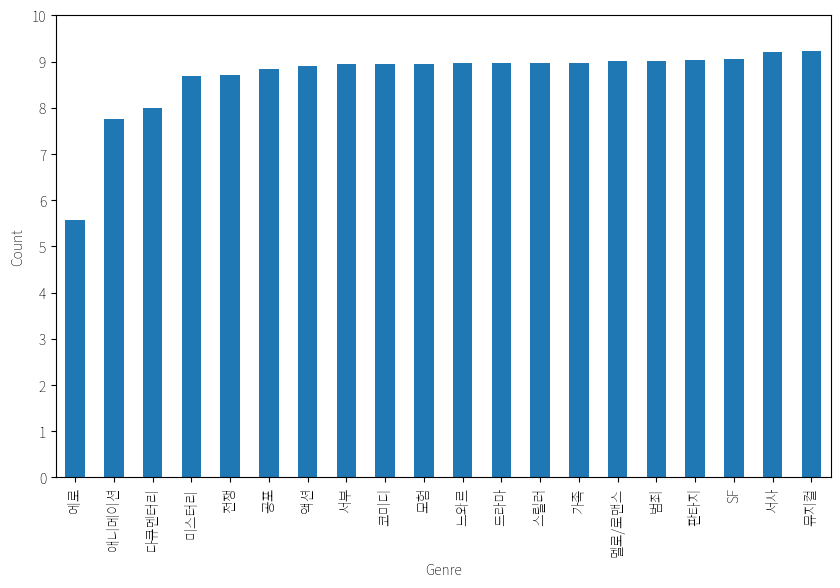

In [8]:
# 장르별 평균 평점 시각화
plt.figure(figsize=(10, 6))
genre_avg_ratings.sort_values().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.yticks(range(0, 11, 1))
plt.xticks(rotation=90)  # x축 라벨 회전
plt.show()